## Multi class perceptron

Assume we have N training examples {(x1,t1),...,(xN,tN)} where tn can get K discrete values {C1, ..., CK}, i.e. a K-class classification problem. We use 𝑦𝑛 to represent the predicted label of 𝑥𝑛 Model. To solve a K-class classification problem, we can learn K weight vectors wk, each of which corresponding to one of the classes. Prediction. In the prediction time, a data point x will be classified as argmaxk wk . x Training Algorithm. We train the multiclass perceptron based on the following
algorithm:

- Initialise the weight vectors randomly w1,..,wK
 * While not converged do:
 * For n = 1 to N do:
 * y=$argmax_k$ wk .xn
    * If yn !=tn do
    * 𝒘𝑦𝑛:=𝒘𝑦𝑛−η𝒙𝑛
    * 𝒘𝑡𝑛:=𝒘𝑡𝑛+η𝒙𝑛

In the section below, we implement a multi class perceptron with gradient descent of mini batches of size 5.

Below we load the data and libraries required to implement the perceptron.

In [45]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.6.1"

In [2]:
train<-read.csv('Task1D_train.csv')

In [3]:
test<-read.csv('Task1D_test.csv')
test.data = test[,1:4]
test.label = test[,5]

In [4]:
Phi_test<- as.matrix(cbind(1, test.data)) 

Auxiliary function to perform predictions

In [5]:
pred_val<-function(Phi,W1,W2,W3)
{
     V1<-Phi%*%W1[1,]
    V2<-Phi%*%W2[1,]
    V3<-Phi%*%W3[1,]
    df<-data.frame('C1'=V1, 'C2'=V2, 'C3'=V3)
    output<-colnames(df)[apply(df,1,which.max)]
    return(output)
}

Below we code the multi class perceptron and the comments to describe how everything works.

In [76]:
set.seed(123) # to make the output reproducible
error_df <- data.frame() # dataframe to store errors
batch = 1 # variable to store batch number
for(index in seq(5,nrow(train),by=5)) # to create mini batches
{
    ind <- 1:index # we split the data based on 5 batches
    train.data = train[ind,1:4]
    train.label = train[ind,5]
    Phi <- as.matrix(cbind(1, train.data)) 
    tau <- 1 # Iteration counter
    eta <- 0.09# Learning rate
    epsilon <- 0.001 # Stoping criterion
    tau.max <- 100000 # Maximum number of iterations
    W1<- matrix(,nrow=tau.max, ncol=ncol(Phi)) # Empty Weight vector for class 1 
    W1[1,] <- runif(ncol(Phi)) # Random initial values for weight vector for class 1
    W2 <- matrix(,nrow=tau.max, ncol=ncol(Phi))  # Empty Weight vector for class 2 
    W2[1,] <- runif(ncol(Phi)) # Random initial values for weight vector for class 2
    W3 <- matrix(,nrow=tau.max, ncol=ncol(Phi))# Empty Weight vector for class 3
    W3[1,] <- runif(ncol(Phi)) # Random initial values for weight vector for class 3
    V1<-Phi%*%W1[1,] # V1,V2 and V3 stores the class labels for C1, C2 and C3
    V2<-Phi%*%W2[1,]
    V3<-Phi%*%W3[1,]
    df<-data.frame('C1'=V1, 'C2'=V2, 'C3'=V3) # dataframe to store the class labels
    output<-colnames(df)[apply(df,1,which.max)] # Tells us which is the class label assigned by the algorithm
    train.len= nrow(train.data) # length of train data
    terminate<-FALSE
    while(!terminate) # while the perceptron doesn't converge
    {
        terminate <- tau >= tau.max| ((sum(pred_val(Phi,W1,W2,W3)!=train.label)/train.len) <= epsilon) # terminate condition(if number of iteration increases or the misclassification rate falls below the threshold)
        for(j in seq(5,train.len,by = 5)) # for loop to execute in a batch of size 5
        {   
            train.index <- sample(1:j, replace = FALSE) # samples the indeces in batches of 5 without replacement so that the data is used entirely.
            Phi_i <- Phi[train.index,] # creates a new phi with the sample and the same with train labels.
            T <- train.label[train.index]
            output<-pred_val(Phi_i,W1,W2,W3) # predict the labels
        
            for (i in 1:5) # performs comparison in batches of 5
            {
       
      
            if (tau == tau.max) {break} # if converged, break
            
            
            if(T[i]!= output[i]) # if the predicted label is not equal to class label
            {
                    
                    # update the weights for each of the classes for misclassification.
                if(T[i]=='C1')
                    
                    {
                    
                    W1[1,] <- W1[1,] + eta * Phi_i[i,] 
                    
                    }
                else if (T[i]=='C2')
                    {
                    
                    W2[1,] <- W2[1,] + eta * Phi_i[i,] 
                    
                    }
                else 
                    {
                   
                    W3[1,] <- W3[1,] + eta * Phi_i[i,] 
                   
                    }
                if(output[i]=='C1') # if the predicted label matches the class label
                    {
                    # update the weights for the right class labels.   
                    W1[1,] <- W1[1,] - eta * Phi_i[i,]
                    }
                else if (output[i]=='C2')
                    {
                    
                    W2[1,] <- W2[1,] - eta * Phi_i[i,] 
                    
                    }
                else 
                    {
                   
                    W3[1,] <- W3[1,] - eta * Phi_i[i,] 
                    
                    }
             }
            tau <- tau + 1 # increment the iteration by 1
            }
        }
    }
    
    error_df[batch,'Error'] <- (sum(pred_val(Phi_test,W1,W2,W3)!=test.label)/nrow(test.data)) # stores the error as each batch gets executed
    error_df[batch, 'Batch_num'] <- batch
    batch = batch + 1
    
}


Below we generate a plot showing the error rate as the number of batch increases

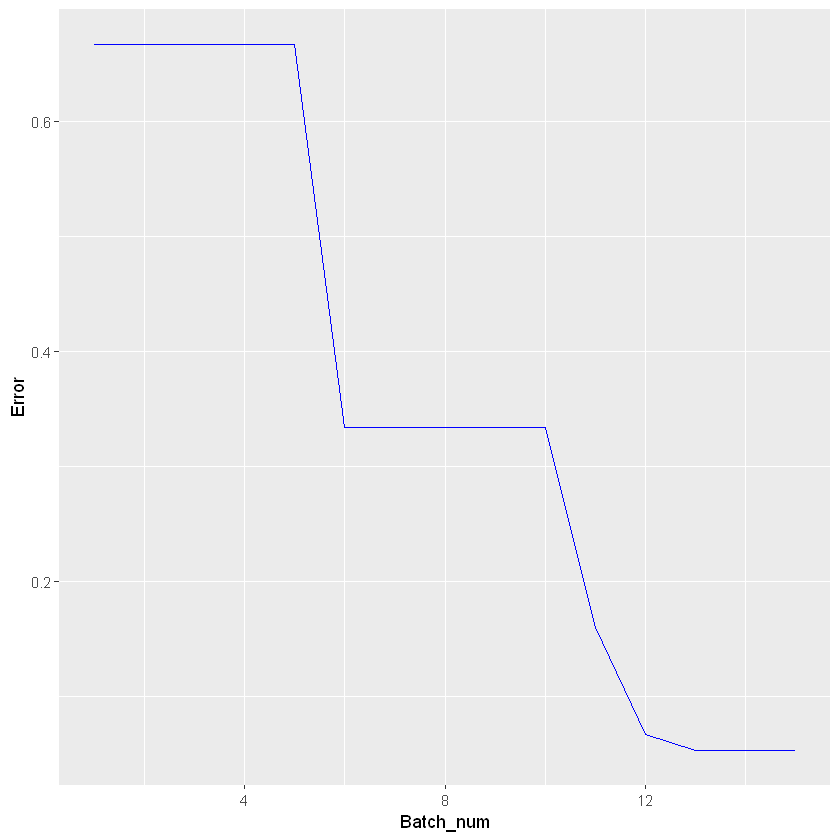

In [77]:
ggplot(error_df,aes(x=Batch_num,y=Error))+geom_line(color='blue')

From the above graph, we can interpret that as the batch numbers increase, the test error decreases. The error starts decreases usualy around batch numbers which are multiples of 5(for example around batch number 5 and 10) after which they stabilize and then decreases again.